# #WeRateDogs Twitter Data by Emma Harvey

In [13]:
# import required pacakages
import pandas as pd
import numpy as np
import requests
import os
import json
import tweepy

## Gather Data

### 1. WeRateDogs Twitter Archive

The twitter_archive_enhanced.csv file was available for download from the Udacity website.

In [14]:
# load twitter_arhcive_enhanced.csv file as dataframa
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [15]:
# view twitter archive dataframe
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### 2. Image Predictions

The image_predictions.tsv file was downloaded programmitaclly from the Udacity server.

In [16]:
# programmitally download image_predictions.tsv file from Udaicty website
#folder_name = 'image_predictions'
#if not os.path.exists(folder_name):
    #os.makedirs(folder_name)
    
#url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
#response = requests.get(url)
#response

In [17]:
# check content of image_predictions.tsv file
#response.content

In [18]:
# open & save image_predictions.tsv file to computer
#with open(os.path.join(folder_name, url.split('/')[-1]), mode='wb')as file:
    #file.write(response.content)

#check contents of folder to make sure it worked
#os.listdir(folder_name)

In [19]:
# load image_predictions.tsv as dataframe
image_predictions = pd.read_csv('image_predictions\image-predictions.tsv', sep='\t')

In [20]:
# view image_predictions dataframe
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### 3. Tweet JSON Data from Twitter API

The twitter API was queried for each tweet's JSON data, using Python's Tweepy library and the tweet IDs obtained from the WeRatedogs Twitter archive document (downloaded previously).  Each tweet's JSON was written to it's own line and stored in a text file (tweet_json.txt). The text file was then read line by line into a pandas dataframe, with tweet ID, retweet count and favourite count.

In [21]:
# Set-up authentification of to use twitter API. Create an API object

import tweepy

#consumer_key = 
#consumer_secret = 
#access_token = 
#access_secret = 

#auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
#auth.set_access_token(access_token, access_secret)

#api = tweepy.API(auth_handler=auth, 
                 #parser=tweepy.parsers.JSONParser(),
                 #wait_on_rate_limit=True, 
                 #wait_on_rate_limit_notify=True)

In [22]:
# Make directory if it doesn't already exist
#folder_name = 'tweet_json'
#if not os.path.exists(folder_name):
    #os.makedirs(folder_name)

# use a timer to indicate when the query of all of the tweet_id's is complete & how long it takes
#from timeit import default_timer as timer
#start = timer()

#df_list = []
#tweet_errors = []
#tweet_id_list = twitter_archive['tweet_id'].tolist()

#for tweet_id in tweet_id_list:
    #try:
        #tweet = api.get_status(tweet_id, tweet_mode='extended')
        #favorite = tweet['favorite_count']
        #retweet = tweet['retweet_count']
        #df_list.append({'tweet_id': int(tweet_id), 
                        #'favorites': int(favorite), 
                        #'retweets': int(retweet)})
                      
    #except Exception as e:
        #tweet_errors.append(tweet_id)
        #print(str(tweet_id) + "_" + str(e))
                
#end = timer()
#print(end - start)

In [23]:
#print(tweet_errors)
#print(len(tweet_errors))
#print(len(df_list))

11 errors obtained, with error code: 144.  This error code indicates that no status was found with that ID number, and it corresponds with HTTP 404: The requested Tweet ID is not found (if it existed, it was probably deleted).

To ensure that these tweets could not be obtained, the code was run again in an attempt to gather the data for the 11 tweet_id's in the tweet_error list.


In [24]:
# run code for tweet_error list in an ottempt to obtain data for these tweets
#from timeit import default_timer as timer
#start = timer()

#tweet_errors_2 = []
#for tweet_id in tweet_errors:
    #try:
        #tweet = api.get_status(tweet_id, tweet_mode='extended')
        #favorite = tweet['favorite_count']
        #retweet = tweet['retweet_count']
        #df_list.append({'tweet_id': int(tweet_id), 
                        #'favorites': int(favorite), 
                        #'retweets': int(retweet)})
                      
    #except Exception as e:
        #tweet_errors_2.append(tweet_id)
        #print(str(tweet_id) + "_" + str(e))
              
#end = timer()
#print(end - start)


In [25]:
# Create DataFrame from list of dictionaries
#df_json = pd.DataFrame(df_list, columns = ['tweet_id', 'favorites', 'retweets'])
# save df_json as text file
#df_json.to_csv('tweet_json.txt', encoding = 'utf-8')

In [26]:
# read json_df
df_json = pd.read_csv('tweet_json.txt')

In [27]:
#view the df_json dataframe
df_json.head()

,Unnamed: 0,tweet_id,favorites,retweets
0,0,892420643555336193,38706,8563
1,1,892177421306343426,33175,6299
2,2,891815181378084864,24977,4180
3,3,891689557279858688,42112,8695
4,4,891327558926688256,40249,9456


## Assess Data

### Twitter_archive Table

In [28]:
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [29]:
# check for missing data & datatype issues
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [30]:
# check for potential outliers in number entries
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [31]:
# view counts for different numerator ratings entries 
twitter_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [32]:
# view counts for different denominator rating entries 
twitter_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [33]:
# look at 10 different random samples
twitter_archive.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
618,796177847564038144,NaN,NaN,2016-11-09 02:29:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Ruby. She just turned o...,7.961497e+17,4.196984e+09,2016-11-09 00:37:46 +0000,https://twitter.com/dog_rates/status/796149749...,11,10,Ruby,None,None,None,None
627,794983741416415232,NaN,NaN,2016-11-05 19:24:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Rizzy. She smiles a lot...,7.895309e+17,4.196984e+09,2016-10-21 18:16:44 +0000,https://twitter.com/dog_rates/status/789530877...,12,10,Rizzy,None,None,None,None
349,831650051525054464,NaN,NaN,2017-02-14 23:43:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...","I usually only share these on Friday's, but th...",NaN,NaN,NaN,"http://www.gofundme.com/bluethewhitehusky,http...",13,10,None,None,None,None,None
83,876537666061221889,NaN,NaN,2017-06-18 20:30:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I can say with the pupmost confidence that the...,NaN,NaN,NaN,https://twitter.com/mpstowerham/status/8761629...,14,10,None,None,None,None,None
783,775350846108426240,NaN,NaN,2016-09-12 15:10:21 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is Maximus. A little rain won't stop him....,NaN,NaN,NaN,https://vine.co/v/ijmv0PD0XXD,12,10,Maximus,None,None,None,None
1190,718234618122661888,NaN,NaN,2016-04-08 00:30:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Suki. She was born with a blurry tail ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/718234618...,11,10,Suki,None,None,None,None
383,827199976799354881,NaN,NaN,2017-02-02 17:00:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Charlie. He wins every game of chess h...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/827199976...,13,10,Charlie,None,None,None,None
633,793845145112371200,NaN,NaN,2016-11-02 16:00:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Clark. He was just caught wearing pant...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/793845145...,13,10,Clark,None,None,None,None
458,817908911860748288,NaN,NaN,2017-01-08 01:40:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Looks like he went cross-eyed trying way too h...,NaN,NaN,NaN,https://twitter.com/micahgrimes/status/8179020...,12,10,None,None,None,None,None
1760,678708137298427904,NaN,NaN,2015-12-20 22:46:44 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",Here we are witnessing a wild field pupper. Lo...,NaN,NaN,NaN,https://vine.co/v/eQjxxYaQ60K,10,10,None,None,None,pupper,None


In [34]:
# check if there are any duplicates
twitter_archive[twitter_archive.text.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [35]:
# check entry types for doggo
twitter_archive['doggo'].value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

### Image Perdictions Table

In [36]:
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [37]:
# check for missing entries & datatype issues
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 119.6+ KB


In [38]:
image_predictions.p1.value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
cocker_spaniel                30
malamute                      30
French_bulldog                26
miniature_pinscher            23
Chesapeake_Bay_retriever      23
seat_belt                     22
Staffordshire_bullterrier     20
Siberian_husky                20
German_shepherd               20
web_site                      19
Cardigan                      19
Maltese_dog                   18
Eskimo_dog                    18
beagle                        18
Shetland_sheepdog             18
teddy                         18
Shih-Tzu                      17
Rottweiler                    17
Lakeland_terrier              17
Italian_greyhound             16
kuvasz                        16
          

In [39]:
image_predictions.p2.value_counts()

Labrador_retriever                104
golden_retriever                   92
Cardigan                           73
Chihuahua                          44
Pomeranian                         42
Chesapeake_Bay_retriever           41
French_bulldog                     41
toy_poodle                         37
cocker_spaniel                     34
Siberian_husky                     33
miniature_poodle                   33
beagle                             28
collie                             27
Pembroke                           27
Eskimo_dog                         27
kuvasz                             26
Italian_greyhound                  22
American_Staffordshire_terrier     21
Pekinese                           21
toy_terrier                        20
chow                               20
malinois                           20
miniature_pinscher                 20
Samoyed                            20
Boston_bull                        19
Norwegian_elkhound                 19
Staffordshir

In [40]:
image_predictions.p3.value_counts()

Labrador_retriever                79
Chihuahua                         58
golden_retriever                  48
Eskimo_dog                        38
kelpie                            35
kuvasz                            34
Staffordshire_bullterrier         32
chow                              32
beagle                            31
cocker_spaniel                    31
toy_poodle                        29
Pomeranian                        29
Pekinese                          29
Chesapeake_Bay_retriever          27
Pembroke                          27
Great_Pyrenees                    27
French_bulldog                    26
malamute                          26
American_Staffordshire_terrier    24
pug                               23
Cardigan                          23
basenji                           21
bull_mastiff                      20
toy_terrier                       20
Siberian_husky                    19
Boston_bull                       17
Shetland_sheepdog                 17
b

In [41]:
image_predictions.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1944,861769973181624320,https://pbs.twimg.com/media/CzG425nWgAAnP7P.jpg,2,Arabian_camel,0.366248,False,house_finch,0.209852,False,cocker_spaniel,0.046403,True
1160,734776360183431168,https://pbs.twimg.com/media/CjJzMlBUoAADMLx.jpg,1,Siberian_husky,0.304902,True,Eskimo_dog,0.155147,True,malamute,0.050942,True
1409,770414278348247044,https://pbs.twimg.com/media/CrEPsfWXEAAKvem.jpg,1,maillot,0.580528,False,maillot,0.081449,False,golden_retriever,0.053570,True
2005,877556246731214848,https://pbs.twimg.com/media/DC20wEcW0AAf59m.jpg,1,basset,0.995368,True,Welsh_springer_spaniel,0.001936,True,bathtub,0.000468,False
657,682303737705140231,https://pbs.twimg.com/media/CXgHoLnWAAA8i52.jpg,1,seat_belt,0.997659,False,Lakeland_terrier,0.001731,True,Airedale,0.000204,True
1362,761292947749015552,https://pbs.twimg.com/media/CpCn5aXXgAAOPTm.jpg,1,standard_poodle,0.660893,True,Samoyed,0.314886,True,miniature_poodle,0.008834,True
783,690015576308211712,https://pbs.twimg.com/media/CZNtgWhWkAAbq3W.jpg,2,malamute,0.949609,True,Siberian_husky,0.033084,True,Eskimo_dog,0.016663,True
508,676098748976615425,https://pbs.twimg.com/media/CWH8L72UkAAvjql.jpg,1,walking_stick,0.162179,False,sandal,0.129086,False,purse,0.081412,False
695,684460069371654144,https://pbs.twimg.com/media/CX-wzZEUwAA4ISM.jpg,1,Labrador_retriever,0.673691,True,Chesapeake_Bay_retriever,0.194897,True,American_Staffordshire_terrier,0.059471,True
758,688789766343622656,https://pbs.twimg.com/media/CY8SocAWsAARuyh.jpg,1,American_Staffordshire_terrier,0.599660,True,Staffordshire_bullterrier,0.380976,True,bull_mastiff,0.003889,True


In [42]:
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


### df_json Table

In [43]:
df_json.head()

,Unnamed: 0,tweet_id,favorites,retweets
0,0,892420643555336193,38706,8563
1,1,892177421306343426,33175,6299
2,2,891815181378084864,24977,4180
3,3,891689557279858688,42112,8695
4,4,891327558926688256,40249,9456


In [44]:
df_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2345 entries, 0 to 2344
Data columns (total 4 columns):
Unnamed: 0    2345 non-null int64
tweet_id      2345 non-null int64
favorites     2345 non-null int64
retweets      2345 non-null int64
dtypes: int64(4)
memory usage: 73.3 KB


In [45]:
df_json.describe()

,Unnamed: 0,tweet_id,favorites,retweets
count,2345.000000,2.345000e+03,2345.000000,2345.000000
mean,1172.000000,7.422940e+17,8048.485714,3017.100213
std,677.087513,6.833642e+16,12111.797976,5018.668178
min,0.000000,6.660209e+17,0.000000,0.000000
25%,586.000000,6.783802e+17,1404.000000,605.000000
50%,1172.000000,7.189392e+17,3527.000000,1405.000000
75%,1758.000000,7.986979e+17,9944.000000,3511.000000
max,2344.000000,8.924206e+17,143084.000000,77175.000000


In [46]:
df_json.favorites.sort_values()

879          0
274          0
783          0
278          0
279          0
624          0
282          0
754          0
619          0
617          0
608          0
294          0
295          0
299          0
605          0
301          0
302          0
822          0
333          0
332          0
591          0
592          0
593          0
324          0
938          0
735          0
595          0
319          0
884          0
311          0
         ...  
2282     48905
647      49244
55       49374
53       50488
132      53414
859      53525
614      54406
386      56076
450      56273
357      56932
1755     61610
7        65396
120      66300
22       69000
348      71821
41       72882
1068     73171
150      76236
37       77435
1819     78993
76       79864
528      81955
113      83226
164      92336
440      93517
65      105743
525     122728
131     124152
1028    127991
404     143084
Name: favorites, Length: 2345, dtype: int64

In [47]:
df_json.retweets.sort_values()

284         0
334         2
1284        2
267         3
111         3
29          4
1069        6
54          7
63         10
418        10
2328       13
2287       14
181        17
1512       19
174        20
2308       21
207        23
1226       25
2178       25
183        28
99         28
400        29
601        31
2249       33
2213       34
956        35
2248       35
2326       35
338        36
874        37
        ...  
438     21119
302     23155
928     23155
441     23319
520     23319
879     23472
1066    23472
1614    23663
644     23663
150     24218
647     25017
113     26743
614     26838
1755    30156
295     30337
450     30337
164     31635
859     32259
160     32260
1819    33620
131     36316
528     39325
437     40943
440     40943
65      44536
404     48998
807     50753
1068    50755
525     60957
1028    77175
Name: retweets, Length: 2345, dtype: int64

### Quality
#### Twitter_archive Table
-  2278 missing entries in 'in_reply_to_status_id', 'in_reply_to_user_id' columns
-  2175 missing entries in 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp' columns
-  59 missing entries in 'expanded urls' column
-  'timestamp' and 'retweeted timestamp' are objects but should be datetime datatypes
-  'rating_numerator' & r'ating_denominator' have values higher than expected (15 - 1776 and 0, 11 - 170, respectively).
-  'in_reply_to_status_id', 'in_reply_to_user_id' 'retweeted_status_id', 'retweeted_status_user_id', columns are all floats, but they should be integers.
-  dog names and dog stages may not have been extracted correclty from the text
-  In 'time' column, +0000 at the end of the column
-  Convert dataytpe of newly added column 'dog_stage' to categorical variable

#### Image_predictions Table
-  Column headings are confusing
-  281 Missing rows. Have 2075 entries in image_predictions, but 2356 entries in twitter_archive table.
-  'p1', 'p2, 'p3' column has some strange dog names: web-site, cardigan,cheeseburger etc.
-  prediction confidence values not listed as percentages

#### df_json Table
-  2345 entries. therefore, 11 less entries than number of entries in twitter_archive.  This is due to the 11 tweets that are considered to have been deleted by the tim the data for the df_json table was collected.

### Tidiness

-  'Unnamed:0' column in df_json table is not needed
-  in twitter_archive table, 'Timestamp' column has both date and time in each observation.
-  'doggo' 'puppo' 'pupper' and 'floofer' are all types of dog stages and so should be under the column 'dog_stage' 
-  Twitter_archive & df_json tables can be combined

## Clean Data

### Copy Data

In [167]:
twitter_archive_clean = twitter_archive.copy()
image_predictions_clean = image_predictions.copy()
df_json_clean = df_json.copy()

### Missing Data

-  2278 missing entries in 'in_reply_to_status_id', 'in_reply_to_user_id' columns
-  2175 missing entries in 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp' columns. Only 181 value entries
-  59 missing entries in 'expanded urls' column
-  281 Missing rows. Have 2075 entries in image_predictions, but 2356 entries in twitter_archive table.
-  2345 entries in df_json. therefore, 11 less entries than number of entries in twitter_archive.  This is due to the 11 tweets that are considered to have been deleted by the tim the data for the df_json table was collected.

**1. 2175 missing entries in 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp' columns. Only 181 value entries**

#### Define
There are 2175 missing entries in the 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp' columns. 
However, the data in these columns are related to retweets.  Since we are only interested in original tweets:
1) Remove the 181 rows in the twitter_archive table that have entries in the columns related to retweets ('retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'). 
2) Remove the columns related to retweets ('retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'). 

#### Clean

In [168]:
# create retweet dataframe, with the 181 rows from the twitter_archive_clean df 
# that has value entries in the 'retweeted_status_id' column
retweet = twitter_archive_clean[twitter_archive_clean['retweeted_status_id'].notnull()]

# Check length of retweet dataframe is 181
len(retweet)

181

In [169]:
# Create twitter_archive_clean_2 table by removing the retweet rows from the twitter_archive_clean table
twitter_archive_clean_2 = twitter_archive_clean[twitter_archive_clean['tweet_id'].isin(retweet['tweet_id']) == False]

# remove 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp' columns 
# from twitter_archive_clean table_2
twitter_archive_clean_2 = twitter_archive_clean_2.drop(['retweeted_status_id', 
                                                  'retweeted_status_user_id', 
                                                  'retweeted_status_timestamp'], 
                                                  axis=1)

#### Test

In [170]:
# check that 181 rows removed from twitter_archive_clean table (2175 rows expected)
len(twitter_archive_clean_2)

2175

In [171]:
# check that retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp' columns 
# removed for twitter_archive clean
list(twitter_archive_clean_2)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

**2. 2278 missing entries in 'in_reply_to_status_id', 'in_reply_to_user_id' columns**

#### Define

There are 2278 missing entries in 'in_reply_to_status_id', 'in_reply_to_user_id' columns. According to the Tweet Data Dictionary (https://developer.twitter.com/en/docs/tweets/data-dictionary/overview/tweet-object), 'in_reply_to_status_id' column contains the integer representation of the original Tweet’s ID, and indicates that the represented Tweet in this row is a reply. Also, the 'in_reply_to_user_id' contains the integer representation of the original Tweet’s author ID (this will not necessarily always be the user directly mentioned in the Tweet). Therefore, the rows in the twitter_archive table that contain non-null values in the 'in_reply_to_status_id' and 'in_reply_to_user_id', show that these tweets are a reply to another tweet. Since we are only interested in original tweets:
1) Remove the rows in the twitter_archvie_clean dataframe that containe non-null values in the 'in_reply_to_status_id' and 'in_reply_to_user_id' columns. 
2) Remove the 'in_reply_to_status_id' and 'in_reply_to_user_id' columns from the twitter_archive_clean dataframe. 

#### Clean

In [172]:
# create reply dataframe, with the 78 rows from the twitter_archive_clean df 
# that has value entries in the 'in_reply_to_status_id' column
reply = twitter_archive_clean[twitter_archive_clean['in_reply_to_status_id'].notnull()]

# check length of reply['tweet_id'] (78 entries expected)
len(reply['tweet_id'])

78

In [173]:
# remove the reply rows from the twitter_archive_clean_2 table
twitter_archive_clean_2 = twitter_archive_clean_2[twitter_archive_clean_2['tweet_id'].isin(reply['tweet_id']) == False]

# remove 'in_reply_to_status_id' and 'in_reply_to_user_id' columns from twitter_archive_clean table
twitter_archive_clean_2 = twitter_archive_clean_2.drop(['in_reply_to_user_id', 
                                                  'in_reply_to_status_id'], 
                                                  axis=1)

#### Test

In [174]:
# check that 78 rows (related to reply data) removed from twitter_archive_clean dataframe (2097 rows expected)
len(twitter_archive_clean_2)

2097

In [175]:
# check that 'in_reply_to_status_id' and 'in_reply_to_user_id' columns
# removed for twitter_archive clean
list(twitter_archive_clean_2)

['tweet_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

**3. 59 missing entries in 'expanded urls' column**

#### Define

The 'expanded_urls' column contains the web links to photo's of the dogs.  For this project, we only want ratings that have images.  Therefore, check if the 59 missing 'expanded_url' links are also missing from the image_predictiosn table.  If so, this suggests that the missing 'expanded_url' links indicate that these tweets don't contain images.  In that case, remove these entries from the twitter_archive_ckean_2 table.


In [176]:
# create an expanded_url dataframe, containing the tweet_id's of entries in 
# the twitter_archive_clean table with missing expanded_urls data
expanded_url_nan = twitter_archive_clean[twitter_archive_clean['expanded_urls'].isnull()]

# check if tweet_id with a missing entry under 'expanded_url' is in the image_predictions table
image_predictions_clean[image_predictions_clean['tweet_id'].isin(expanded_url_nan['tweet_id'])]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [177]:
# check how many of the missing entries in the 'expanded_urls' columns are left
# in the twitter_archive_clean_2 table (since removing retweet and replies data)
expanded_url_nan_left = twitter_archive_clean_2[twitter_archive_clean_2['expanded_urls'].isnull()]

expanded_url_nan_left

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
375,828361771580813312,2017-02-05 21:56:51 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Beebop and Doobert should start a band 12/10 w...,NaN,12,10,None,None,None,None,None
707,785515384317313025,2016-10-10 16:20:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Today, 10/10, should be National Dog Rates Day",NaN,10,10,None,None,None,None,None
1445,696518437233913856,2016-02-08 02:18:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Oh my god 10/10 for every little hot dog pupper,NaN,10,10,None,None,None,pupper,None


Since the 'retweets' and 'replies' data has been removed from the twitter_archive table, there are now only 3 missing entries in the 'expanded_urls' column.  The tweet_id's of these entries are not found in the image_predictions table, anf furthermore, analysis of the text of these 3 entries indicates that they are gneral comments, and not posts of pictures of dogs with the corresponding rating.  Therefore, these entry rows can be removed from the twitter_archive_clean_2 table.

In [178]:
# remove the remaining 3 rows with missing data in the 'expanded_urls" column, from the twitter_archive_clean_2 table
twitter_archive_clean_2 = twitter_archive_clean_2[twitter_archive_clean_2['tweet_id'].isin(expanded_url_nan_left['tweet_id']) == False]

#### Test

In [179]:
twitter_archive_clean_2[twitter_archive_clean_2['expanded_urls'].isnull()]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [180]:
# should have 3 less entries in twitter_archive_clean)2 (2094 expected)
twitter_archive_clean_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2094 non-null int64
timestamp             2094 non-null object
source                2094 non-null object
text                  2094 non-null object
expanded_urls         2094 non-null object
rating_numerator      2094 non-null int64
rating_denominator    2094 non-null int64
name                  2094 non-null object
doggo                 2094 non-null object
floofer               2094 non-null object
pupper                2094 non-null object
puppo                 2094 non-null object
dtypes: int64(3), object(9)
memory usage: 139.1+ KB


**4.  2345 entries in df_json. therefore, 11 less entries than number of entries in twitter_archive.**

#### Define

There are 2345 entries in df_json, which is 11 less entries than the number of entries in twitter_archive. This is due to the 11 tweets that could not be collected when quering the twitter API, and the error message indicated that these tweets have since been deleted.

Remove the 11 deleted tweets from the twitter_archive_clean_2 table, so that the changes in entry rows are well understood when these tables are merged in the 'Tidiness' section

#### Clean

In [181]:
# check if tweet_errors (i.e. deleted tweets) found when importing json files from twitter API, 
# are twitter_archive_clean_2 table

tweet_errors = [888202515573088257, 873697596434513921, 869988702071779329, 866816280283807744, 
                861769973181624320, 845459076796616705, 842892208864923648, 837012587749474308, 
                827228250799742977, 802247111496568832, 775096608509886464]

twitter_archive_clean_2.loc[twitter_archive_clean_2['tweet_id'].isin(tweet_errors)]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


#### Test

In [182]:
twitter_archive_clean.loc[twitter_archive_clean['tweet_id'].isin(tweet_errors)]


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
95,873697596434513921,NaN,NaN,2017-06-11 00:25:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Walter. He won't start ...,8.688804e+17,4.196984e+09,2017-05-28 17:23:24 +0000,https://twitter.com/dog_rates/status/868880397...,14,10,Walter,None,None,None,None
118,869988702071779329,NaN,NaN,2017-05-31 18:47:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: We only rate dogs. This is quit...,8.591970e+17,4.196984e+09,2017-05-02 00:04:57 +0000,https://twitter.com/dog_rates/status/859196978...,12,10,quite,None,None,None,None
132,866816280283807744,NaN,NaN,2017-05-23 00:41:20 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Jamesy. He gives a kiss...,8.664507e+17,4.196984e+09,2017-05-22 00:28:40 +0000,https://twitter.com/dog_rates/status/866450705...,13,10,Jamesy,None,None,pupper,None
155,861769973181624320,NaN,NaN,2017-05-09 02:29:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: ""Good afternoon class today we'...",8.066291e+17,4.196984e+09,2016-12-07 22:38:52 +0000,https://twitter.com/dog_rates/status/806629075...,13,10,None,None,None,None,None
247,845459076796616705,NaN,NaN,2017-03-25 02:15:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Here's a heartwarming scene of ...,7.562885e+17,4.196984e+09,2016-07-22 00:43:32 +0000,https://twitter.com/dog_rates/status/756288534...,12,10,None,None,None,None,None
260,842892208864923648,NaN,NaN,2017-03-18 00:15:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Stephan. He just wants ...,8.071068e+17,4.196984e+09,2016-12-09 06:17:20 +0000,https://twitter.com/dog_rates/status/807106840...,13,10,Stephan,None,None,None,None
298,837012587749474308,NaN,NaN,2017-03-01 18:52:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @KennyFromDaBlok: 14/10 h*ckin good hats. w...,8.370113e+17,7.266347e+08,2017-03-01 18:47:10 +0000,https://twitter.com/KennyFromDaBlok/status/837...,14,10,None,None,None,None,None
382,827228250799742977,NaN,NaN,2017-02-02 18:52:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Phil. He's an important...,6.946697e+17,4.196984e+09,2016-02-02 23:52:22 +0000,https://twitter.com/dog_rates/status/694669722...,12,10,Phil,None,None,None,None
566,802247111496568832,NaN,NaN,2016-11-25 20:26:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Everybody drop what you're doin...,7.790561e+17,4.196984e+09,2016-09-22 20:33:42 +0000,https://twitter.com/dog_rates/status/779056095...,13,10,None,None,None,None,None


The tweet_id's, from the tweet_errors list, were no longer present in the twitter_archive_clean_2 table.  Therefore, these tweets must have been removed from the table already, in the previous cleaning steps.  To check this, the original twitter_archive_clean table (before cleaning was done) was queried for the presence of the tweet_id's in the tweet_errors list.  Analysis of the selected table showed that all of the tweet errors were related to retweets (see the entries in the 'retweeted_status_id' column), and therefore it makes sense that these tweets are no longer present in the twitter_archive_clean_2 table.

**5. 281 Missing rows in image_predictions: Have 2075 entries in image_predictions, but 2356 entries in twitter_archive table**

#### Define

The image_predictions table has 281 less rows than the twitter_archive table.  Now that the twitter_archive table has been cleaned up to remove data related to retweets, replies, missing 'expanded_urls', and deleted tweets (tweet_errors), investigate the difference in number of entries between the 2 tables. 

#### Clean

In [183]:
# check the difference in number of entries between image_predictions table
# and twitter_archive_clean_2 table
print('image_predictions entries ' + str(len(image_predictions['tweet_id'])))
print('twitter_archive_clean_2 entries ' + str(len(twitter_archive_clean_2['tweet_id'])))

image_predictions entries 2075
twitter_archive_clean_2 entries 2094


In [184]:
# check the difference in number of entries between image_predictions table
# and twitter_archive_clean_2 table
twitter_archive_clean_2.loc[twitter_archive_clean_2['tweet_id'].isin(image_predictions['tweet_id']) == False].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 123 entries, 35 to 2212
Data columns (total 12 columns):
tweet_id              123 non-null int64
timestamp             123 non-null object
source                123 non-null object
text                  123 non-null object
expanded_urls         123 non-null object
rating_numerator      123 non-null int64
rating_denominator    123 non-null int64
name                  123 non-null object
doggo                 123 non-null object
floofer               123 non-null object
pupper                123 non-null object
puppo                 123 non-null object
dtypes: int64(3), object(9)
memory usage: 8.2+ KB


In [185]:
# remove entries with tweet_id's related to 'retweet' data
image_predictions_clean = image_predictions_clean.loc[image_predictions_clean['tweet_id'].isin(retweet['tweet_id']) == False]

In [186]:
len(image_predictions_clean['tweet_id'])

1994

In [187]:
# remove entries related to 'reply' data
image_predictions_clean = image_predictions_clean.loc[image_predictions_clean['tweet_id'].isin(reply['tweet_id']) == False]

In [188]:
len(image_predictions_clean['tweet_id'])

1971

In [189]:
# check if tweet_errors (i.e. deleted tweets) found when importing json files from twitter API, 
# are in image_predictions_remove table

tweet_errors = [888202515573088257, 873697596434513921, 869988702071779329, 866816280283807744, 
                861769973181624320, 845459076796616705, 842892208864923648, 837012587749474308, 
                827228250799742977, 802247111496568832, 775096608509886464]

image_predictions_clean.loc[image_predictions_clean['tweet_id'].isin(tweet_errors)]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


#### Test

In [190]:
# check the difference in number of entries between image_predictions_remove table
# and twitter_archive_clean_2 table
twitter_archive_clean_2.loc[twitter_archive_clean_2['tweet_id'].isin(image_predictions_clean['tweet_id']) == False].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 123 entries, 35 to 2212
Data columns (total 12 columns):
tweet_id              123 non-null int64
timestamp             123 non-null object
source                123 non-null object
text                  123 non-null object
expanded_urls         123 non-null object
rating_numerator      123 non-null int64
rating_denominator    123 non-null int64
name                  123 non-null object
doggo                 123 non-null object
floofer               123 non-null object
pupper                123 non-null object
puppo                 123 non-null object
dtypes: int64(3), object(9)
memory usage: 8.2+ KB


Due to the fact that we only want original ratings (no retweets) that have images for this project, the tweet_id's related to retweets and replies were removed from the image_predictions_clean table.  Once these entries had been removed from the table, it was found that the tweet_id's collected in the tweet_errors list (i.e. the deleted tweets) were also not present in the image_predictions_clean table.

The image_predictions_clean table has 1971 entries, which is still 123 entries less than the twitter_archive_clean_2 table (with a total of 2094 entries).  However, in line with the 'tidy data' rules, these two tables will not be merged as image predictions and tweet information are seen as two different types of observational units.  Therefore, further investigations into the difference in entries between the two dataframes are not required for the purpose of this project.

### Tidiness

-  'Unnamed:0' column in df_json table is not needed
-  In twitter_archive table, 'Timestamp' column has both date and time in each observation.
-  Twitter_archive & df_json tables can be combined

**1. 'Unnamed:0' column in df_json table is not needed**

#### Define

Remove 'Unnamed: 0' column from df_json_clean table

#### Clean

In [191]:
# drop 'Unnamed: 0' column from df_json_clean table
df_json_clean = df_json_clean.drop('Unnamed: 0', axis=1)

#### Test

In [192]:
df_json_clean.head()

,tweet_id,favorites,retweets
0,892420643555336193,38706,8563
1,892177421306343426,33175,6299
2,891815181378084864,24977,4180
3,891689557279858688,42112,8695
4,891327558926688256,40249,9456


**2. In twitter_archive table, 'Timestamp' column has both date and time in each observation.**

#### Define

In the twitter_archive table, seperate date and time in the 'timestamp' column, into 2 different columns, using panda's regular expressions and string.extract method

#### Clean

In [193]:
# extract date from 'timestamp' column
twitter_archive_clean_2['date'] = twitter_archive_clean_2.timestamp.str.extract('(\d{4}-\d{2}-\d{2})', expand=True)

# extract time from 'timestamp' column
twitter_archive_clean_2['time'] = twitter_archive_clean_2.timestamp.str.extract('(\d{2}:\d{2}:\d{2}\s\+\d{4})', expand=True)

# remove 'timestamp' column
twitter_archive_clean_2 = twitter_archive_clean_2.drop('timestamp', axis=1)

#### Test

In [194]:
twitter_archive_clean_2.sample(5)

,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,date,time
213,851591660324737024,"<a href=""http://twitter.com/download/iphone"" r...",Oh jeez u did me quite the spook little fella....,https://twitter.com/dog_rates/status/851591660...,11,10,None,None,None,None,None,2017-04-11,00:24:08 +0000
910,757611664640446465,"<a href=""http://twitter.com/download/iphone"" r...",This is Cooper. He tries to come across as fei...,https://twitter.com/dog_rates/status/757611664...,12,10,Cooper,None,None,None,None,2016-07-25,16:21:11 +0000
1750,679001094530465792,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is Rascal. He's paddling an imaginary can...,https://vine.co/v/iKIwAzEatd6,11,10,Rascal,None,None,None,None,2015-12-21,18:10:50 +0000
1797,677269281705472000,"<a href=""http://twitter.com/download/iphone"" r...",This is the happiest pupper I've ever seen. 10...,https://twitter.com/dog_rates/status/677269281...,10,10,the,None,None,pupper,None,2015-12-16,23:29:14 +0000
2235,668171859951755264,"<a href=""http://twitter.com/download/iphone"" r...",This is a Trans Siberian Kellogg named Alfonso...,https://twitter.com/dog_rates/status/668171859...,7,10,a,None,None,None,None,2015-11-21,20:59:20 +0000


**3) In twitter_archive_clean_1 table, 'doggo' 'puppo' 'pupper' and 'floofer' are all types of dog stages and so should be under the column 'dog_stage'.**

#### Define

-  Create subset of twitter_archive_clean_2 dataframe, called 'dog', with 'tweet_id', 'doggo' 'puppo' 'pupper' and 'floofer' columns. 
-  Convert all 'None' entries to NaN values.  
-  Use ".combine_first" method to merge together values from  'doggo' 'puppo' 'pupper' and 'floofer' columns into new 'dog stage' column. 
-  Merge 'dog_stage'column into twitter_archvie_clean_2 dataframe, and drop 'doggo' 'puppo' 'pupper' and 'floofer' columns.

#### Clean

In [195]:
# create new 'dog' dataframe and convert all 'None' values to NaN values
dog = twitter_archive_clean_2[['tweet_id', 'doggo', 'floofer', 'puppo', 'pupper']].replace('None', np.nan)

In [196]:
# create new column "dog_stage' with same values as 'doggo' column
dog['dog_stage'] = dog['doggo']

# check new column "dog_stage'
dog[dog['doggo'] == 'doggo'].sample(5)

,tweet_id,doggo,floofer,puppo,pupper,dog_stage
423,821765923262631936,doggo,NaN,NaN,NaN,doggo
724,782747134529531904,doggo,NaN,NaN,NaN,doggo
121,869596645499047938,doggo,NaN,NaN,NaN,doggo
9,890240255349198849,doggo,NaN,NaN,NaN,doggo
448,819006400881917954,doggo,NaN,NaN,NaN,doggo


In [197]:
# use ".combine_first" methods, to add nonull values from 'floofer', 'puppo', 'pupper' columns into 'dog_stage' column
dog['dog_stage'] = dog['floofer'].combine_first(dog['dog_stage'])
dog['dog_stage'] = dog['puppo'].combine_first(dog['dog_stage'])
dog['dog_stage'] = dog['pupper'].combine_first(dog['dog_stage'])

In [198]:
# test if ".combine_first" method worked
dog[(dog['floofer'] == 'floofer') | (dog['doggo'] == 'doggo') | 
          (dog['puppo'] == 'puppo') | (dog['pupper'] == 'pupper')].sample(10)

,tweet_id,doggo,floofer,puppo,pupper,dog_stage
501,813096984823349248,doggo,NaN,NaN,NaN,doggo
1076,739606147276148736,NaN,NaN,NaN,pupper,pupper
1945,673707060090052608,NaN,NaN,NaN,pupper,pupper
402,824325613288833024,NaN,NaN,NaN,pupper,pupper
1204,716080869887381504,doggo,NaN,NaN,NaN,doggo
1980,672975131468300288,NaN,NaN,NaN,pupper,pupper
363,829374341691346946,doggo,NaN,NaN,NaN,doggo
1022,746542875601690625,NaN,floofer,NaN,NaN,floofer
1138,728035342121635841,NaN,NaN,NaN,pupper,pupper
616,796484825502875648,doggo,NaN,NaN,NaN,doggo


In [199]:
# remove all columns from dog dataframe, except fot 'tweet_id' and 'dog_stage'
dog = dog.drop(['doggo', 'floofer', 'puppo', 'pupper'], axis=1)

In [200]:
# check that columns were dropped
list(dog)

['tweet_id', 'dog_stage']

In [201]:
# merge dog and twitter_archive_clean_2 dataframes
twitter_archive_clean_2 = pd.merge(left = twitter_archive_clean_2, right = dog, on = 'tweet_id')

In [202]:
# remove 'doggo', 'floofer', 'puppo', 'pupper' columns from twitter_archive_clean_2 df.
twitter_archive_clean_2 = twitter_archive_clean_2.drop(['doggo', 'floofer', 'puppo', 'pupper'], axis=1)

#### Test

In [203]:
# check 'dog_stage' column added to twitter_archive_clean_2
# and 'doggo', 'floofer', 'puppo', 'pupper' columns removed
twitter_archive_clean_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 0 to 2093
Data columns (total 10 columns):
tweet_id              2094 non-null int64
source                2094 non-null object
text                  2094 non-null object
expanded_urls         2094 non-null object
rating_numerator      2094 non-null int64
rating_denominator    2094 non-null int64
name                  2094 non-null object
date                  2094 non-null object
time                  2094 non-null object
dog_stage             335 non-null object
dtypes: int64(3), object(7)
memory usage: 122.7+ KB


**4) Twitter_archive & df_json tables can be combined**

#### Define

Merge twitter_archive and df_json, joining on tweet_id, to create twitter_archive_master dataframe.

Note that, the image_predcitions table will not be merged with the twitter_archvie_master dataframe.  Considering the 'tidy data' rules, the two tables related to image predictions and tweet information can be seen as two different types of observational units.

#### Clean

In [204]:
twitter_archive_master = pd.merge(left = twitter_archive_clean_2, right = df_json_clean, on=('tweet_id'))

#### Test

In [205]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 0 to 2093
Data columns (total 12 columns):
tweet_id              2094 non-null int64
source                2094 non-null object
text                  2094 non-null object
expanded_urls         2094 non-null object
rating_numerator      2094 non-null int64
rating_denominator    2094 non-null int64
name                  2094 non-null object
date                  2094 non-null object
time                  2094 non-null object
dog_stage             335 non-null object
favorites             2094 non-null int64
retweets              2094 non-null int64
dtypes: int64(5), object(7)
memory usage: 155.4+ KB


### Quality


Twitter_archive Table

-  'timestamp' and 'retweeted timestamp' are objects but should be datetime datatypes
-  'rating_numerator' & r'ating_denominator' have values higher than expected (15 - 1776 and 0, 11 - 170, respectively).
-  'in_reply_to_status_id', 'in_reply_to_user_id' 'retweeted_status_id', 'retweeted_status_user_id', columns are all floats, but they should be integers.
-  dog names and dog stages may not have been extracted correclty from the text
-  In 'time' column, +0000 at the end of the column
-  'dog_stage' shoul be categorical variable, not object

Image_predictions Table
-  Column headings are confusing
-  'p1', 'p2, 'p3' column has some strange dog names: web-site, cardigan,cheeseburger etc.
-  prediction confidence values not listed as percentages


**1. Datatypes in the twitter_archive_master dataframe** 
-  **'timestamp' and 'retweeted timestamp' are objects but should be datetime datatypes**
-  **'in_reply_to_status_id', 'in_reply_to_user_id' 'retweeted_status_id', 'retweeted_status_user_id', columns are all floats, but they should be integers.**
-  **In 'time' column, +0000 at the end of the column**
-  **'dog_stage' should be converted from object type to categrical variable.**

#### Define

The 'retweeted timestamp' 'in_reply_to_status_id', 'in_reply_to_user_id' 'retweeted_status_id' and 'retweeted_status_user_id', columns have been removed from the twitter_archive_master dataframe, therefore this datatype quality issue is no longer relevant.

The 'timestamp' column was separated into a 'date' and 'time' column in the 'tidy data' process.  Therefore:
- remove the '+0000' string at the end of each value in the 'time' column
-  Convert 'date' column from object to datetime datatype. 
-  Convert 'dog_stage' to categorical variable.

#### Clean

In [206]:
# remove '+0000' at the end of each entry in the 'time' column
twitter_archive_master['time'] = twitter_archive_master['time'].str[:8]

In [207]:
# Convert 'date' column from object to datetime datatype
twitter_archive_master['date'] = pd.to_datetime(twitter_archive_master['date'])

In [208]:
# Convert 'dog_stage' to categorical variable.
twitter_archive_master['dog_stage'] = twitter_archive_master['dog_stage'].astype('category')

#### Test

In [209]:
# Check '+000' removed from the end of entries in 'time' column
twitter_archive_master.sample(5)

,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,date,time,dog_stage,favorites,retweets
1061,708810915978854401,"<a href=""http://twitter.com/download/iphone"" r...",This is Mister. He's a wonderful father to his...,https://twitter.com/dog_rates/status/708810915...,10,10,Mister,2016-03-13,00:24:26,NaN,17592,7589
1779,671744970634719232,"<a href=""http://twitter.com/download/iphone"" r...",Very fit horned dog here. Looks powerful. Not ...,https://twitter.com/dog_rates/status/671744970...,6,10,None,2015-12-01,17:37:36,NaN,1396,812
400,811627233043480576,"<a href=""http://twitter.com/download/iphone"" r...",This is Augie. He's a savage. Doesn't give a h...,https://twitter.com/dog_rates/status/811627233...,10,10,Augie,2016-12-21,17:39:46,NaN,13945,3520
1764,672139350159835138,"<a href=""http://twitter.com/download/iphone"" r...",This pup has a heart on its ass and that is do...,https://twitter.com/dog_rates/status/672139350...,12,10,None,2015-12-02,19:44:43,NaN,1811,764
442,801538201127157760,"<a href=""http://twitter.com/download/iphone"" r...",This is Wallace. He'll be your chau-fur this e...,https://twitter.com/dog_rates/status/801538201...,12,10,Wallace,2016-11-23,21:29:33,NaN,8937,2315


In [210]:
# Check 'date' and 'time' column now as datetime datatype and 'dog_stage' as category
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 0 to 2093
Data columns (total 12 columns):
tweet_id              2094 non-null int64
source                2094 non-null object
text                  2094 non-null object
expanded_urls         2094 non-null object
rating_numerator      2094 non-null int64
rating_denominator    2094 non-null int64
name                  2094 non-null object
date                  2094 non-null datetime64[ns]
time                  2094 non-null object
dog_stage             335 non-null category
favorites             2094 non-null int64
retweets              2094 non-null int64
dtypes: category(1), datetime64[ns](1), int64(5), object(5)
memory usage: 157.6+ KB


**2) 'rating_numerator' & rating_denominator' have values higher than expected (15 - 1776 and 0, 11 - 170, respectively).**

#### Define

There are 22 entries in the twitter_archive_master dataframe, whereby the 'rating_numerator' is higher than expected (15 or greater) and the 'rating_denomintar' is not equal to 10, as expected.  The 'text' column,from which these values were extracted was checked to for mistakes during the data extraction methods.  

-  In the case that the data from the 'text' column was not extracted properly, change the rating_numerator and rating_denominator entries to their real values.  

In [211]:
# overview of unexpected rating values
unexpected_ratings = twitter_archive_master[(twitter_archive_master['rating_numerator'] >= 15) | (twitter_archive_master['rating_denominator'] < 10) | 
                       (twitter_archive_master['rating_denominator'] > 10)]

In [212]:
# save unexpected_ratings df for visual assessment
unexpected_ratings.to_csv('unexpected_ratings.csv')

#### Clean

In [213]:
unexp_rate_id = []
for tweet_id in unexpected_ratings['tweet_id']:
    unexp_rate_id.append(tweet_id)

unexp_rate_id

[820690176645140481,
 810984652412424192,
 786709082849828864,
 778027034220126208,
 758467244762497024,
 749981277374128128,
 740373189193256964,
 731156023742988288,
 722974582966214656,
 716439118184652801,
 713900603437621249,
 710658690886586372,
 709198395643068416,
 704054845121142784,
 697463031882764288,
 684222868335505415,
 682962037429899265,
 680494726643068929,
 677716515794329600,
 675853064436391936,
 670842764863651840,
 666287406224695296]

Following visual assessment of teh unexpected_ratings df, the following tweet_id's are to be updated with the real numerator and denominator ratings, as listed:

-  786709082849828864 => num = 9.75
-  778027034220126208 => num = 11.25
-  740373189193256964 => num = 14; den = 10
-  722974582966214656 => num = 13; den = 10
-  716439118184652801 => num = 11; den = 10
-  682962037429899265 => num = 10; den = 10
-  680494726643068929 => num = 11.26
-  666287406224695296 => num = 9; den = 10
 
The remaing tweets in the list were actually rated with unusual numerator and denominator values, and therefore, won't be changed:   

[820690176645140481, 810984652412424192, 758467244762497024, 749981277374128128, 731156023742988288, 
713900603437621249, 710658690886586372, 709198395643068416, 704054845121142784, 697463031882764288, 
684222868335505415, 677716515794329600, 675853064436391936, 670842764863651840]

In [214]:
# some of the actual numerator values are floats, so need to change datatype for 'rating_numerator'
# and 'rating_denominator' columns from int to float
twitter_archive_master['rating_numerator'] = twitter_archive_master['rating_numerator'].astype(float)
twitter_archive_master['rating_denominator'] = twitter_archive_master['rating_denominator'].astype(float)

In [215]:
# For some entries in unexpected_ratings df, the numerator and denominator values were extracted incorrectly
# Manually change these
twitter_archive_master.loc[(twitter_archive_master['tweet_id'] == 786709082849828864), ['rating_numerator']] = 9.75
twitter_archive_master.loc[(twitter_archive_master['tweet_id'] == 778027034220126208), ['rating_numerator']] = 11.25
twitter_archive_master.loc[(twitter_archive_master['tweet_id'] == 740373189193256964), ['rating_numerator']] = 14
twitter_archive_master.loc[(twitter_archive_master['tweet_id'] == 740373189193256964), ['rating_denominator']] = 10
twitter_archive_master.loc[(twitter_archive_master['tweet_id'] == 722974582966214656), ['rating_numerator']] = 13
twitter_archive_master.loc[(twitter_archive_master['tweet_id'] == 722974582966214656), ['rating_denominator']] = 10
twitter_archive_master.loc[(twitter_archive_master['tweet_id'] == 716439118184652801), ['rating_numerator']] = 11
twitter_archive_master.loc[(twitter_archive_master['tweet_id'] == 716439118184652801), ['rating_denominator']] = 10
twitter_archive_master.loc[(twitter_archive_master['tweet_id'] == 682962037429899265), ['rating_numerator']] = 10
twitter_archive_master.loc[(twitter_archive_master['tweet_id'] == 682962037429899265), ['rating_denominator']] = 10
twitter_archive_master.loc[(twitter_archive_master['tweet_id'] == 680494726643068929), ['rating_numerator']] = 11.26
twitter_archive_master.loc[(twitter_archive_master['tweet_id'] ==  666287406224695296), ['rating_numerator']] = 9
twitter_archive_master.loc[(twitter_archive_master['tweet_id'] ==  666287406224695296), ['rating_denominator']] = 10

#### Test

In [216]:
# list of tweet_id's of the tweets for which the numerator and denominator values were updated to the correct values
updated_rating_id = [786709082849828864, 778027034220126208, 740373189193256964, 722974582966214656, 716439118184652801, 
                     682962037429899265, 680494726643068929, 666287406224695296]  
 
twitter_archive_master[twitter_archive_master['tweet_id'].isin(updated_rating_id)]

,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,date,time,dog_stage,favorites,retweets
527,786709082849828864,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",https://twitter.com/dog_rates/status/786709082...,9.75,10.0,Logan,2016-10-13,23:23:56,NaN,19845,6833
584,778027034220126208,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,https://twitter.com/dog_rates/status/778027034...,11.25,10.0,Sophie,2016-09-20,00:24:34,pupper,7133,1817
851,740373189193256964,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",https://twitter.com/dog_rates/status/740373189...,14.00,10.0,None,2016-06-08,02:41:38,NaN,37094,14584
946,722974582966214656,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,https://twitter.com/dog_rates/status/722974582...,13.00,10.0,None,2016-04-21,02:25:47,NaN,4375,1711
983,716439118184652801,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,https://twitter.com/dog_rates/status/716439118...,11.00,10.0,Bluebert,2016-04-03,01:36:11,NaN,2509,238
1423,682962037429899265,"<a href=""http://twitter.com/download/iphone"" r...",This is Darrel. He just robbed a 7/11 and is i...,https://twitter.com/dog_rates/status/682962037...,10.00,10.0,Darrel,2016-01-01,16:30:13,NaN,39608,18345
1471,680494726643068929,"<a href=""http://twitter.com/download/iphone"" r...",Here we have uncovered an entire battalion of ...,https://twitter.com/dog_rates/status/680494726...,11.26,10.0,None,2015-12-25,21:06:00,NaN,1827,528
2073,666287406224695296,"<a href=""http://twitter.com/download/iphone"" r...",This is an Albanian 3 1/2 legged Episcopalian...,https://twitter.com/dog_rates/status/666287406...,9.00,10.0,an,2015-11-16,16:11:11,NaN,147,67


In [217]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 0 to 2093
Data columns (total 12 columns):
tweet_id              2094 non-null int64
source                2094 non-null object
text                  2094 non-null object
expanded_urls         2094 non-null object
rating_numerator      2094 non-null float64
rating_denominator    2094 non-null float64
name                  2094 non-null object
date                  2094 non-null datetime64[ns]
time                  2094 non-null object
dog_stage             335 non-null category
favorites             2094 non-null int64
retweets              2094 non-null int64
dtypes: category(1), datetime64[ns](1), float64(2), int64(3), object(5)
memory usage: 157.6+ KB


**3) Dog stages may not have been extracted correctly from the text**

#### Define

 -  Subset the twitter_archive_master df for all of the rows with null values in the 'dog_stage' column. 
 -  Investigate the 'text' column for words containing 'doggo', 'floofer', 'puppo', 'pupper' using str.contains() method, and if found, update the 'dog_stage' column with the appropriate dog_stage description.
 -  Update the 'dog_stage' column in the twitter_archive_master df with any newly found dog_stage description

#### Clean

In [218]:
# subset the twitter_archive_master df for all of the rows with null values in the 'dog_stage' column. 
dog_stage_NaN = twitter_archive_master[twitter_archive_master['dog_stage'].isnull()]

In [219]:
dog_stage_NaN.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1759 entries, 0 to 2093
Data columns (total 12 columns):
tweet_id              1759 non-null int64
source                1759 non-null object
text                  1759 non-null object
expanded_urls         1759 non-null object
rating_numerator      1759 non-null float64
rating_denominator    1759 non-null float64
name                  1759 non-null object
date                  1759 non-null datetime64[ns]
time                  1759 non-null object
dog_stage             0 non-null category
favorites             1759 non-null int64
retweets              1759 non-null int64
dtypes: category(1), datetime64[ns](1), float64(2), int64(3), object(5)
memory usage: 132.4+ KB


In [220]:
# Investigate the 'text' column for words containing 'doggo', 'floofer', 'puppo', 'pupper' using str.contains() method
doggo = dog_stage_NaN[dog_stage_NaN['text'].str.contains("doggo")]
floofer = dog_stage_NaN[dog_stage_NaN['text'].str.contains("floofer")] 
puppo = dog_stage_NaN[dog_stage_NaN['text'].str.contains("puppo")]
pupper = dog_stage_NaN[dog_stage_NaN['text'].str.contains("pupper")]

In [221]:
# update the 'dog_stage' column with the appropriate dog_stage description
doggo['dog_stage'] = doggo['dog_stage'].fillna('doggo')
floofer['dog_stage'] = floofer['dog_stage'].fillna('floofer')
puppo['dog_stage'] = puppo['dog_stage'].fillna('puppo')
pupper['dog_stage'] = pupper['dog_stage'].fillna('pupper')

C:\Users\Emma\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Emma\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\Emma\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pa

In [222]:
# join the updated 'dog_stage' columns in a new df called dog_stage_update
dog_stage_update = pd.concat([doggo, floofer, puppo, pupper])

# limit the dog_stage_update to only 3 relevant columns and save it for visual analysis
dog_stage_update = dog_stage_update[['tweet_id', 'text', 'dog_stage']]
dog_stage_update.to_csv('dog_stage_update.csv')

In [223]:
# load the saved dog_stage_update csv file
dog_stage_update = pd.read_csv('dog_stage_update.csv')

In [224]:
dog_stage_update.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 4 columns):
Unnamed: 0    36 non-null int64
tweet_id      36 non-null int64
text          36 non-null object
dog_stage     36 non-null object
dtypes: int64(2), object(2)
memory usage: 904.0+ bytes


In [225]:
# Update the 'dog_stage' column in the twitter_archive_master df with any newly found dog_stage descriptions
# by combining it with the dog_stage_update['dog_stage'] column.
twitter_archive_master['dog_stage'] = dog_stage_update['dog_stage'].combine_first(twitter_archive_master['dog_stage'])


In [226]:
# visual analysis of dog_stage_update csv file, showed 1 tweets allocated dog_stages incorrectly:
# row 1045: advertisement for weratedogs stickers => remove row
twitter_archive_master = twitter_archive_master.drop(twitter_archive_master.index[1045])

#### Test

In [227]:
# ensure we have the expected extra 32 non-null values in the 'dog_stage' column (367 non-null expected)
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2093 entries, 0 to 2093
Data columns (total 12 columns):
tweet_id              2093 non-null int64
source                2093 non-null object
text                  2093 non-null object
expanded_urls         2093 non-null object
rating_numerator      2093 non-null float64
rating_denominator    2093 non-null float64
name                  2093 non-null object
date                  2093 non-null datetime64[ns]
time                  2093 non-null object
dog_stage             367 non-null object
favorites             2093 non-null int64
retweets              2093 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(3), object(6)
memory usage: 163.5+ KB


In [228]:
# check row 1045 (advertisement for weratedogs stickers) removed
twitter_archive_master.iloc[1043:1047,]

,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,date,time,dog_stage,favorites,retweets
1043,710117014656950272,"<a href=""http://twitter.com/download/iphone"" r...",This pupper got her hair chalked for her birth...,https://twitter.com/dog_rates/status/710117014...,11.0,10.0,None,2016-03-16,14:54:24,pupper,5853,2168
1044,709918798883774466,"<a href=""http://twitter.com/download/iphone"" r...",Meet Watson. He's a Suzuki Tickleboop. Leader ...,https://twitter.com/dog_rates/status/709918798...,12.0,10.0,Watson,2016-03-16,01:46:45,NaN,3174,1167
1046,709852847387627521,"<a href=""http://twitter.com/download/iphone"" r...",*lets out a tiny whimper and then collapses* ....,https://twitter.com/dog_rates/status/709852847...,12.0,10.0,None,2016-03-15,21:24:41,NaN,3730,1298
1047,709566166965075968,"<a href=""http://twitter.com/download/iphone"" r...",This is Olaf. He's gotta be rare. Seems sturdy...,https://twitter.com/dog_rates/status/709566166...,12.0,10.0,Olaf,2016-03-15,02:25:31,NaN,3761,1317


**4) All dog names may not have been extracted from text properly, and all tweets don't refer to dogs.**

#### Define

-  Subset the 'None', 'a', 'an', 'the' entries in the 'name' column in the twitter_archive_master df
-  Take note of text that indicates the tweet is not based on a dog rating and remove such row
-  Investigate text for correct dog names, and update 'name' column where appropriate.

In [229]:
# Subset the 'None', 'a' 'an', 'the' entries in the 'name' column in the twitter_archive_master df
twitter_archive_master[(twitter_archive_master['name'] == 'None') | (twitter_archive_master['name'] == 'a') | 
                      (twitter_archive_master['name'] == 'an') | (twitter_archive_master['name'] == 'the')]

,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,date,time,dog_stage,favorites,retweets
5,891087950875897856,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13.0,10.0,None,2017-07-29,00:08:17,doggo,20180,3133
7,890729181411237888,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13.0,10.0,None,2017-07-28,00:22:40,doggo,65396,19001
12,889665388333682689,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo that seems to be on the fence a...,https://twitter.com/dog_rates/status/889665388...,13.0,10.0,None,2017-07-25,01:55:32,puppo,48026,10112
23,887343217045368832,"<a href=""http://twitter.com/download/iphone"" r...",You may not have known you needed to see this ...,https://twitter.com/dog_rates/status/887343217...,13.0,10.0,None,2017-07-18,16:08:03,pupper,33624,10459
24,887101392804085760,"<a href=""http://twitter.com/download/iphone"" r...",This... is a Jubilant Antarctic House Bear. We...,https://twitter.com/dog_rates/status/887101392...,12.0,10.0,None,2017-07-18,00:07:08,pupper,30474,5991
32,885518971528720385,"<a href=""http://twitter.com/download/iphone"" r...",I have a new hero and his name is Howard. 14/1...,https://twitter.com/4bonds2carbon/status/88551...,14.0,10.0,None,2017-07-13,15:19:09,pupper,20383,3778
33,885167619883638784,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a corgi undercover as a malamute....,https://twitter.com/dog_rates/status/885167619...,13.0,10.0,None,2017-07-12,16:03:00,pupper,21900,4403
37,884441805382717440,"<a href=""http://twitter.com/download/iphone"" r...","I present to you, Pup in Hat. Pup in Hat is gr...",https://twitter.com/dog_rates/status/884441805...,14.0,10.0,None,2017-07-10,15:58:53,NaN,26942,5674
38,884247878851493888,"<a href=""http://twitter.com/download/iphone"" r...",OMG HE DIDN'T MEAN TO HE WAS JUST TRYING A LIT...,https://twitter.com/kaijohnson_19/status/88396...,13.0,10.0,None,2017-07-10,03:08:17,NaN,72882,20552
43,883117836046086144,"<a href=""http://twitter.com/download/iphone"" r...",Please only send dogs. We don't rate mechanics...,https://twitter.com/dog_rates/status/883117836...,13.0,10.0,None,2017-07-07,00:17:54,NaN,37158,6710


Visual assessment of the subset data with 'name' equal to 'None' or 'a', highlighted a few text entries indicating that these tweets do not refer to ratings of dogs.  Therefore, these tweets can be removed.

In [230]:
# check how many rows in dataframe before removing rows
twitter_archive_master.text.count()

2093

In [231]:
not_dogs = ['only rate dogs', 'We. Don\'t. Rate.', 'don\'t rate', 'without dog', 'stop sending pictures', 
            'We. Only. Rate. Dogs', 'stop sending', 'shark', 'sherk', 'not a dog']

In [232]:
# remove the entries that do not refer to dog ratings
for s in not_dogs:
    twitter_archive_master = twitter_archive_master[twitter_archive_master['text'].str.contains(s) == False]

In [233]:
# check if rows removed from dataframe
twitter_archive_master.text.count()

2003

For the tweets without proper dog names in the 'name' column, the text was investigated for correct dog names.  It was identified that most of the dog names followed the phrase 'named ...' or 'name is ...'. Therefore, the dog names were extracted from the text and the 'name' column was updated, as shown below.

In [234]:
# subset dataframe for 'None' and 'a' entries in 'name' column
missing_names = twitter_archive_master[(twitter_archive_master['name'] == 'None') | (twitter_archive_master['name'] == 'a')
                                      | (twitter_archive_master['name'] == 'an') | (twitter_archive_master['name'] == 'the')]

missing_names.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 597 entries, 5 to 2093
Data columns (total 12 columns):
tweet_id              597 non-null int64
source                597 non-null object
text                  597 non-null object
expanded_urls         597 non-null object
rating_numerator      597 non-null float64
rating_denominator    597 non-null float64
name                  597 non-null object
date                  597 non-null datetime64[ns]
time                  597 non-null object
dog_stage             147 non-null object
favorites             597 non-null int64
retweets              597 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(3), object(6)
memory usage: 46.6+ KB


In [235]:
# save subset dataframe for visual analysis
missing_names.to_csv('missing_names.csv')

In [236]:
missing_names = missing_names[['tweet_id', 'text', 'name']]

# extract 'text' entries with 'named ....' text in it and add result to new column 'named'.
missing_names['named'] = missing_names['text'].str.extract('(named\s\w*)', expand=True)

# extract 'text' entries with 'name is ....' text in it and add result to new column 'name_is'.
missing_names['name_is'] = missing_names['text'].str.extract('(name is\s\w*[\s\w*]*)', expand=True)

# Check correct data in new column 'named' and 'name_is'.
missing_names[(missing_names['named'].notnull()) | (missing_names['name_is'].notnull())].sample(5)

,tweet_id,text,name,named,name_is
2049,666781792255496192,This is a purebred Bacardi named Octaviath. Ca...,a,named Octaviath,NaN
2006,667524857454854144,Another topnotch dog. His name is Big Jumpy Ra...,None,NaN,name is Big Jumpy Rat
2008,667509364010450944,This a Norwegian Pewterschmidt named Tickles. ...,None,named Tickles,NaN
1780,671743150407421952,This is a Tuscaloosa Alcatraz named Jacob (Yac...,a,named Jacob,NaN
1860,670427002554466305,This is a Deciduous Trimester mix named Spork....,a,named Spork,NaN


In [237]:
# remove the string 'named ' from named column.
missing_names['named'] = missing_names['named'].str[6:]

# Check correct data in new column 'named' and 'name_is'.
missing_names[missing_names['named'].notnull()]

,tweet_id,text,name,named,name_is
1607,675706639471788032,This is a Sizzlin Menorah spaniel from Brookly...,a,Wylie,NaN
1701,673636718965334016,This is a Lofted Aphrodisiac Terrier named Kip...,a,Kip,NaN
1780,671743150407421952,This is a Tuscaloosa Alcatraz named Jacob (Yac...,a,Jacob,NaN
1810,671147085991960577,This is a Helvetica Listerine named Rufus. Thi...,a,Rufus,NaN
1860,670427002554466305,This is a Deciduous Trimester mix named Spork....,a,Spork,NaN
1869,670361874861563904,This is a Rich Mahogany Seltzer named Cherokee...,a,Cherokee,NaN
1872,670303360680108032,This is a Speckled Cauliflower Yosemite named ...,a,Hemry,NaN
1890,669923323644657664,This is a spotted Lipitor Rumpelstiltskin name...,a,Alphred,NaN
1904,669564461267722241,This is a Coriander Baton Rouge named Alfredo....,a,Alfredo,NaN
1909,669363888236994561,Here we have a Gingivitis Pumpernickel named Z...,None,Zeus,NaN


In [238]:
# extract 'text' entries with 'name is ....' text in it and add result to new column 'name_is'.
missing_names['name_is'] = missing_names['name_is'].str[8:]


# Check correct data in new column 'named' and 'name_is'.
missing_names[missing_names['name_is'].notnull()]

,tweet_id,text,name,named,name_is
32,885518971528720385,I have a new hero and his name is Howard. 14/1...,None,NaN,Howard
140,859607811541651456,Sorry for the lack of posts today. I came home...,None,NaN,Zoey and she
1493,679736210798047232,This pup's name is Sabertooth (parents must be...,None,NaN,Sabertooth
2006,667524857454854144,Another topnotch dog. His name is Big Jumpy Ra...,None,NaN,Big Jumpy Rat
2026,667177989038297088,This is a Dasani Kingfisher from Maine. His na...,a,NaN,Daryl


In [239]:
# fix error in 'name_is' for tweet_id = 859607811541651456.
missing_names['name_is'] = missing_names['name_is'].replace('Zoey and she', 'Zoey')

# Check correct data in new column 'named' and 'name_is'.
missing_names[missing_names['name_is'].notnull()]

,tweet_id,text,name,named,name_is
32,885518971528720385,I have a new hero and his name is Howard. 14/1...,None,NaN,Howard
140,859607811541651456,Sorry for the lack of posts today. I came home...,None,NaN,Zoey
1493,679736210798047232,This pup's name is Sabertooth (parents must be...,None,NaN,Sabertooth
2006,667524857454854144,Another topnotch dog. His name is Big Jumpy Ra...,None,NaN,Big Jumpy Rat
2026,667177989038297088,This is a Dasani Kingfisher from Maine. His na...,a,NaN,Daryl


In [240]:
# Combine the 'named' and 'name_is' columns into 'name_is' column.
missing_names['named'] = missing_names['name_is'].combine_first(missing_names['named'])

# check updated 'named' column
missing_names[missing_names['named'].notnull()].head()

missing_names.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 597 entries, 5 to 2093
Data columns (total 5 columns):
tweet_id    597 non-null int64
text        597 non-null object
name        597 non-null object
named       28 non-null object
name_is     5 non-null object
dtypes: int64(1), object(4)
memory usage: 18.7+ KB


In [241]:
# Update the 'name' column in the twitter_archive_master df with the entries in the 'named' column in missing_names df.

# first convert all 'a', 'None', 'an',  'the' values in 'name' column of twitter_archive_master df to null values
twitter_archive_master['name'] = twitter_archive_master['name'].replace('None', np.nan)
twitter_archive_master['name'] = twitter_archive_master['name'].replace('a', np.nan)
twitter_archive_master['name'] = twitter_archive_master['name'].replace('an', np.nan)
twitter_archive_master['name'] = twitter_archive_master['name'].replace('the', np.nan)

twitter_archive_master.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2003 entries, 0 to 2093
Data columns (total 12 columns):
tweet_id              2003 non-null int64
source                2003 non-null object
text                  2003 non-null object
expanded_urls         2003 non-null object
rating_numerator      2003 non-null float64
rating_denominator    2003 non-null float64
name                  1406 non-null object
date                  2003 non-null datetime64[ns]
time                  2003 non-null object
dog_stage             361 non-null object
favorites             2003 non-null int64
retweets              2003 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(3), object(6)
memory usage: 156.5+ KB


In [242]:
# Combining 'name' column of twitter_archive_master df with 'named' column in missing_names df
twitter_archive_master['name'] = missing_names['named'].combine_first(twitter_archive_master['name'])

#### Test

In [243]:
twitter_archive_master[(twitter_archive_master['name'] == 'the') | (twitter_archive_master['name'] == 'an')]

,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,date,time,dog_stage,favorites,retweets


In [244]:
# check 'names' column updated accordingly (should have 1406 + 28 = 1434 non-null values)
# and twitter_archive_master should have 2004 after 89 entries not related to dog ratings were removed
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2003 entries, 0 to 2093
Data columns (total 12 columns):
tweet_id              2003 non-null int64
source                2003 non-null object
text                  2003 non-null object
expanded_urls         2003 non-null object
rating_numerator      2003 non-null float64
rating_denominator    2003 non-null float64
name                  1434 non-null object
date                  2003 non-null datetime64[ns]
time                  2003 non-null object
dog_stage             361 non-null object
favorites             2003 non-null int64
retweets              2003 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(3), object(6)
memory usage: 156.5+ KB


**5) Image_predictions Table, prediction confidence values not listed as percentages**

#### Define
Change prediction confidence values to percentage value, by multiplying values by 100, as easier to understand.
Also change percentage values from floats to ints.

#### Clean

In [245]:
# multiply predictions confidence values by 100 to get % confidence values
image_predictions_clean['p1_conf'] = image_predictions_clean['p1_conf']*100
image_predictions_clean['p2_conf'] = image_predictions_clean['p2_conf']*100
image_predictions_clean['p3_conf'] = image_predictions_clean['p3_conf']*100

In [246]:
# mconvert % confidence values from floats to ints
image_predictions_clean['p1_conf'] = image_predictions_clean['p1_conf'].astype(int)
image_predictions_clean['p2_conf'] = image_predictions_clean['p2_conf'].astype(int)
image_predictions_clean['p3_conf'] = image_predictions_clean['p3_conf'].astype(int)

#### Test

In [247]:
image_predictions_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,46,True,collie,15,True,Shetland_sheepdog,6,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,50,True,miniature_pinscher,7,True,Rhodesian_ridgeback,7,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,59,True,malinois,13,True,bloodhound,11,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,40,True,redbone,36,True,miniature_pinscher,22,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,56,True,Rottweiler,24,True,Doberman,15,True


6) Image_predictions table: column headings are confusing

#### Define

Change column headings of img_num, p1, p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf, p3_dog  

#### Clean

In [248]:
# rename columns
image_predictions_clean = image_predictions_clean.rename(columns = {'img_num': 'image_number', 
                                                                    'p1': 'prediction_1',
                                                                    'p1_conf': 'prediction_1_confidence(%)', 
                                                                    'p1_dog' : 'prediction_1_dog', 
                                                                    'p2': 'prediction_2',
                                                                    'p2_conf': 'prediction_2_confidence(%)', 
                                                                    'p2_dog' : 'prediction_2_dog', 
                                                                    'p3': 'prediction_3',
                                                                    'p3_conf': 'prediction_3_confidence(%)', 
                                                                    'p3_dog' : 'prediction_3_dog'})

#### Test

In [249]:
image_predictions_clean.sample()

,tweet_id,jpg_url,image_number,prediction_1,prediction_1_confidence(%),prediction_1_dog,prediction_2,prediction_2_confidence(%),prediction_2_dog,prediction_3,prediction_3_confidence(%),prediction_3_dog
561,677895101218201600,https://pbs.twimg.com/media/CWhd_7WWsAAaqWG.jpg,1,dalmatian,55,True,kuvasz,6,True,Great_Pyrenees,5,True


## Store Data

#### Store as CSV files

In [250]:
# store twitter_archive_master as csv file

twitter_archive_master.to_csv('twitter_archive_master')

In [251]:
# store image_predictions_clean as csv file
image_predictions_clean.to_csv('image_predictions_clean')

#### Store as relational database

In [278]:
from sqlalchemy import create_engine

#Store twitter_archive_master as relational database

# create SQLAlchemy Engine and empty twitter_archive_master database
engine = create_engine('sqlite:///twitter_master_db.db')

# Store dataframe in a database table called master in twitter_archive_master database
twitter_archive_master.to_sql('twitter_master', engine, index=False)

In [279]:
# Read twitter_archive_master data in database back into a pandas DataFrame
twitter_archive_master = pd.read_sql('SELECT * FROM twitter_master', engine)

In [280]:
#Store image_predictions_clean as relational database

# create SQLAlchemy Engine and empty twitter_archive_master database
engine = create_engine('sqlite:///image_predictions_clean_db.db')

# Store dataframe in a database table called master in twitter_archive_master database
image_predictions_clean.to_sql('image_predict_db', engine, index=False)

In [281]:
# Read twitter_archive_master data in database back into a pandas DataFrame
image_prediction_clean = pd.read_sql('SELECT * FROM image_predict_db', engine)

## Analyse Data

In [256]:
%matplotlib inline

import matplotlib.pyplot as plt

### 1) Retweets versus Favorites

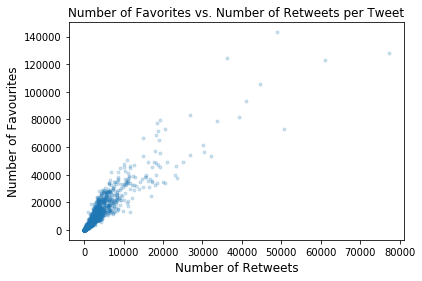

In [257]:
_ = plt.plot(twitter_archive_master['retweets'], twitter_archive_master['favorites'], marker='.', linestyle = 'none', 
            alpha = 0.2)

plt.xlabel('Number of Retweets', size = 12)
plt.ylabel('Number of Favourites', size = 12)
plt.title('Number of Favorites vs. Number of Retweets per Tweet')

plt.show()

In [258]:
result = np.corrcoef(twitter_archive_master['retweets'], twitter_archive_master['favorites'])

print('Correlation coefficient = ' + str(result[0:1, 1:2]))

Correlation coefficient = [[0.91626151]]


In [259]:
twitter_archive_master.describe()

,tweet_id,rating_numerator,rating_denominator,favorites,retweets
count,2.004000e+03,2004.000000,2004.000000,2004.000000,2004.000000
mean,7.349727e+17,12.213204,10.447605,8612.072355,2710.929142
std,6.652317e+16,41.251491,6.733182,12283.123652,4686.297767
min,6.660209e+17,0.000000,7.000000,80.000000,13.000000
25%,6.761805e+17,10.000000,10.000000,1881.000000,601.750000
50%,7.081344e+17,11.000000,10.000000,3917.000000,1318.500000
75%,7.860044e+17,12.000000,10.000000,10847.750000,3114.000000
max,8.924206e+17,1776.000000,170.000000,143084.000000,77175.000000


### 2) Dog Stage vs. Favorites & Rating

#### Dog Stage vs. Favorites

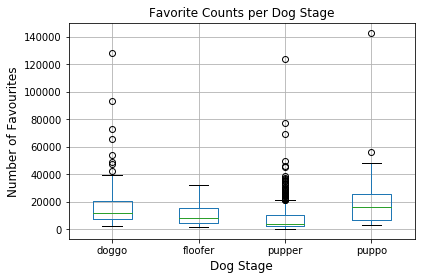

In [260]:
twitter_archive_master.boxplot(column = 'favorites', by = 'dog_stage')

plt.xlabel('Dog Stage', size = 12)
plt.ylabel('Number of Favourites', size = 12)
plt.title('Favorite Counts per Dog Stage', size = 12)
plt.suptitle("")

plt.show()

#### Dog Stage vs. Rating

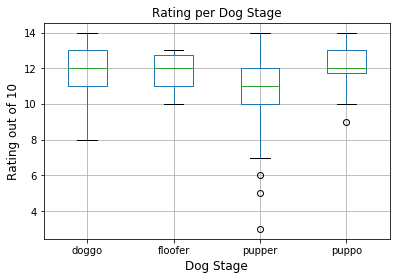

In [261]:
twitter_archive_master.boxplot(column = 'rating_numerator', by = 'dog_stage')

plt.xlabel('Dog Stage', size = 12)
plt.ylabel('Rating out of 10', size = 12)
plt.title('Rating per Dog Stage', size=12)
plt.suptitle("")

plt.show()

### 3) Image Predictions

-  A histogram showing the counts of the confidence levels of the algorithm's number one prediction of the type of dog in the pictures.

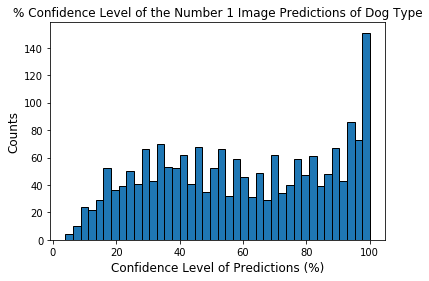

In [262]:
ip1 = plt.hist(image_predictions_clean['prediction_1_confidence(%)'], bins=40, edgecolor="k")

plt.xlabel('Confidence Level of Predictions (%)', size = 12)
plt.ylabel('Counts', size = 12)
plt.title('% Confidence Level of the Number 1 Image Predictions of Dog Type', size=12)

plt.show()

In [263]:
image_predictions_clean['prediction_1_confidence(%)'].describe()

count    1971.000000
mean       58.942161
std        27.192353
min         4.000000
25%        36.000000
50%        58.000000
75%        84.000000
max       100.000000
Name: prediction_1_confidence(%), dtype: float64

### 4) Dog Type vs. Favorite Counts

#### Preparing data set

-  The dog types that were listed as the algorithm's number one prediction for the image in the tweet, were collected in a list called 'common_dogs', if that dog type was predicted 30 time or more.

In [264]:
# filter image_predictions table for entries where the algorithm's #1 prediction predicts a dog
dog_true = image_predictions_clean[image_predictions_clean['prediction_1_dog'] == True]

In [265]:
dog_true['prediction_1_confidence(%)'].describe()

count    1463.000000
mean       60.992481
std        26.008929
min         4.000000
25%        39.000000
50%        61.000000
75%        85.000000
max        99.000000
Name: prediction_1_confidence(%), dtype: float64

In [266]:
dog_true['prediction_1'].value_counts().head(15)
       

golden_retriever            137
Labrador_retriever           94
Pembroke                     88
Chihuahua                    78
pug                          54
chow                         41
Samoyed                      40
Pomeranian                   38
toy_poodle                   37
malamute                     29
cocker_spaniel               27
French_bulldog               26
Chesapeake_Bay_retriever     23
miniature_pinscher           21
German_shepherd              20
Name: prediction_1, dtype: int64

In [267]:
common_dogs = ['golden_retriever', 'Labrador_retriever', 'Pembroke', 'Chihuahua', 'pug', 
               'chow', 'Samoyed', 'toy_poodle', 'Pomeranian', 'cocker_spaniel', 'malamute']

Subset image_predictions_clean dataframe for entries where:
-  the algorithm's #1 prediction predicts a dog
-  only contains entries for the 11 most common types of dogs predicted
-  the % confidence level of the prediction if 90% or greater
-  store in new df 'common_dog_p90' 

Then, merge the new 'common_dog_p90' dataframe with the twitter_archive_master df, to create new df 'twitter_image_common_p90', and convert 'dog_stage' and 'prediction_1' columns to categorical variables

In [268]:
common_dog_p90 = image_predictions_clean[(image_predictions_clean['prediction_1_dog'] == True) & 
                        (image_predictions_clean['prediction_1'].isin(common_dogs)) &
                       (image_predictions_clean['prediction_1_confidence(%)'] >= 90)]

In [269]:
twitter_image_common_p90 = pd.merge(left = twitter_archive_master[['tweet_id', 'rating_numerator', 'rating_denominator', 
                                                              'dog_stage', 'favorites', 'retweets']], 
                               right = common_dog_p90[['tweet_id', 'prediction_1', 
                                                          'prediction_1_confidence(%)', 'prediction_1_dog']], 
                               left_on = ['tweet_id'], right_on = ['tweet_id'])

In [270]:
# Convert dog_stage & prediction_1 to categorical datatype
twitter_image_common_p90['dog_stage'] = twitter_image_common_p90['dog_stage'].astype('category')
twitter_image_common_p90['prediction_1'] = twitter_image_common_p90['prediction_1'].astype('category')

In [271]:
twitter_image_common_p90.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 162 entries, 0 to 161
Data columns (total 9 columns):
tweet_id                      162 non-null int64
rating_numerator              162 non-null float64
rating_denominator            162 non-null float64
dog_stage                     28 non-null category
favorites                     162 non-null int64
retweets                      162 non-null int64
prediction_1                  162 non-null category
prediction_1_confidence(%)    162 non-null int32
prediction_1_dog              162 non-null bool
dtypes: bool(1), category(2), float64(2), int32(1), int64(3)
memory usage: 9.0 KB


In [272]:
twitter_image_common_p90['prediction_1'].value_counts()

golden_retriever      35
Pembroke              24
pug                   23
Samoyed               17
Pomeranian            15
Labrador_retriever    15
Chihuahua             13
chow                   9
toy_poodle             5
malamute               3
cocker_spaniel         3
Name: prediction_1, dtype: int64

In [273]:
#### Data Analysis

-  From the 'twitter_image_common_p90' df, the predicted dog types were grouped together, and the average favorites count for each dog type was calulated. The results were displayed on a bar plot.

In [274]:
dog_favorite_mean = twitter_image_common_p90.groupby('prediction_1', as_index=False)[['favorites']].mean()

In [275]:
dog_favorite_mean

,prediction_1,favorites
0,Chihuahua,5971.384615
1,Labrador_retriever,17122.200000
2,Pembroke,15734.916667
3,Pomeranian,5450.400000
4,Samoyed,12462.588235
5,chow,8896.666667
6,cocker_spaniel,2841.333333
7,golden_retriever,12565.542857
8,malamute,4583.000000
9,pug,6624.521739


In [276]:
# store 'dog_favourite_mean' df as csv file
dog_favorite_mean.to_csv('dog_favorite_mean.csv')

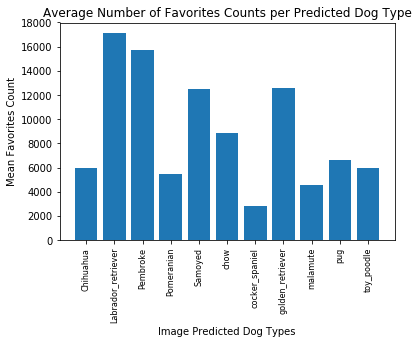

In [277]:
_ = plt.bar(dog_favorite_mean['prediction_1'], dog_favorite_mean['favorites'], align='center')

plt.xticks(rotation=90, size = 8)
plt.xlabel('Image Predicted Dog Types')
plt.ylabel('Mean Favorites Count')
plt.title('Average Number of Favorites Counts per Predicted Dog Type')


plt.show()